# **Conditional Graph**

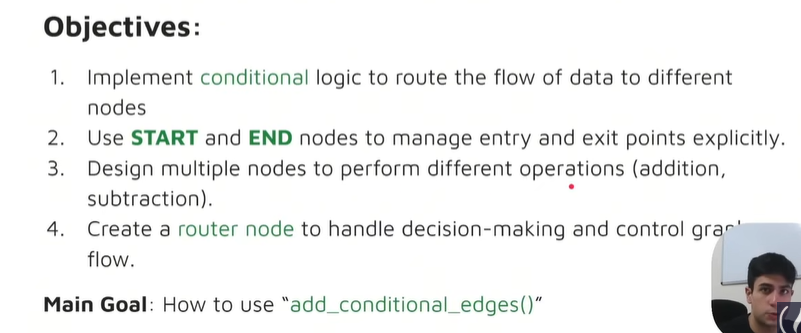

In [22]:
!pip install pyppeteer


In [17]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [18]:
class AgentState(TypedDict):
    number1 : int
    operation : str
    number2 : int
    finalNumber : int

In [ ]:
def adder(state: AgentState) -> AgentState:
    """This node adds the number"""
    state['finalNumber'] = state['number1'] + state['number2']
    return state

def subtractor(state: AgentState) -> AgentState:
    """This node subtracts the number"""
    state['finalNumber'] = state['number1'] - state['number2']
    return state

def decide_next_node(state: AgentState) -> str:
    """This node decides which operation to perform next"""
    if state['operation'] == '+':
        return 'added_operation'
    elif state['operation'] == '-':
        return 'subtractor_operation'


In [20]:
# build the state graph
graph = StateGraph(AgentState)

# add node
graph.add_node("add_node",adder)
graph.add_node("subtract_node",subtractor)
graph.add_node("router",lambda state:state) # passthorugh function 

# add edges
graph.add_edge(START, "router")
graph.add_conditional_edges(
    "router", # source node
    decide_next_node, # condition function
    # target nodes based on condition
    {
        "added_operation": "add_node", # if condition is true
        "subtractor_operation": "subtract_node" # if condition is false
    }
)
graph.add_edge("add_node", END)
graph.add_edge("subtract_node", END)

app = graph.compile()


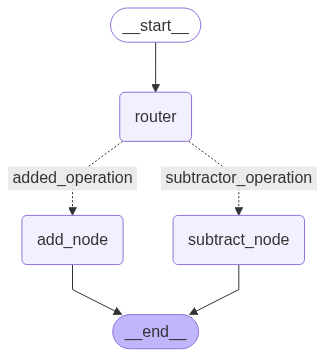

In [ ]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png(max_retries=5, retry_delay=2.0)))

In [30]:
input = AgentState(number1 = 2,operation= '+',number2= 3)
result = app.invoke(input)

In [31]:
result

{'number1': 2, 'operation': '+', 'number2': 3, 'finalNumber': 5}

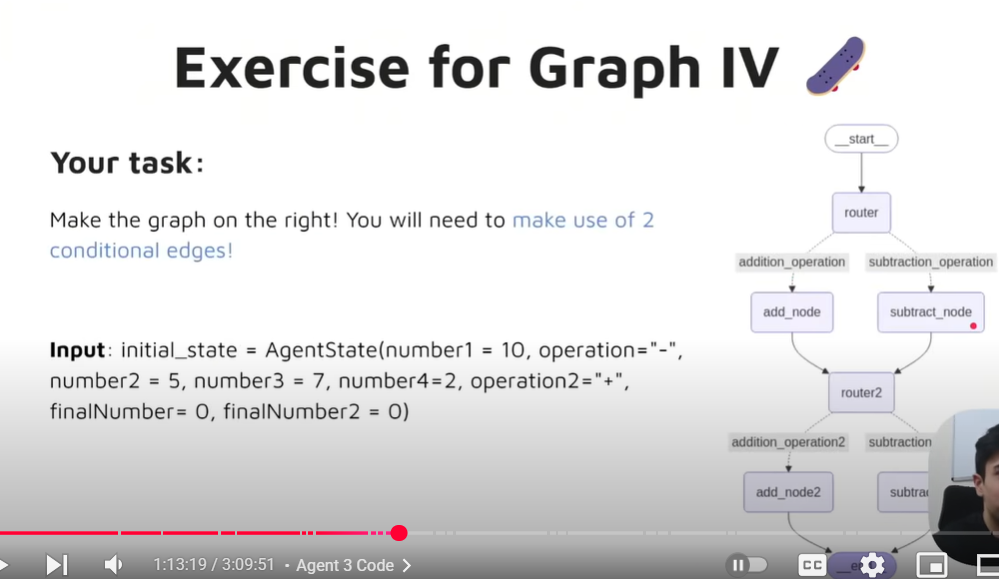

In [ ]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [32]:
class AgentState(TypedDict):
    number1 : int
    operation1 : str
    number2 : int
    finalNumber1 : int
    
    number3 : int
    operation2 : str
    number4 : int
    finalNumber2 : int

In [48]:
def adder1(state: AgentState) -> AgentState:
    """This node adds the number"""
    state['finalNumber1'] = state['number1'] + state['number2']
    return state

def subtractor1(state: AgentState) -> AgentState:
    """This node subtracts the number"""
    state['finalNumber1'] = state['number1'] - state['number2']
    return state

def adder2(state: AgentState) -> AgentState:
    """This node adds the number"""
    state['finalNumber2'] = state['number3'] + state['number4']
    return state

def subtractor2(state: AgentState) -> AgentState:
    """This node subtracts the number"""
    state['finalNumber2'] = state['number3'] - state['number4']
    return state

def decide_next_node1(state: AgentState) -> str:
    """This node decides which operation to perform next"""
    if state['operation1'] == '+':
        return 'added_operation'
    elif state['operation1'] == '-':
        return 'subtractor_operation'
    
def decide_next_node2(state: AgentState) -> str:
    """This node decides which operation to perform next"""
    if state['operation2'] == '+':
        return 'added_operation'
    elif state['operation2'] == '-':
        return 'subtractor_operation'


In [ ]:
# build the state graph
graph = StateGraph(AgentState)

# add node
graph.add_node("add_node1",adder1)
graph.add_node("subtract_node1",subtractor1)
graph.add_node("add_node2",adder2)
graph.add_node("subtract_node2",subtractor2)
graph.add_node("router1",lambda state:state) # passthorugh function 
graph.add_node("router2",lambda state:state) # passthorugh function 

# add edges
graph.add_edge(START, "router1")
graph.add_conditional_edges( 
    "router1", # source node
    decide_next_node1, # condition function
    # target nodes based on condition
    {
        "added_operation": "add_node1", # if condition is true
        "subtractor_operation": "subtract_node1" # if condition is false
    }
)
graph.add_edge("add_node1","router2")
graph.add_edge("subtract_node1","router2")
graph.add_conditional_edges(
    "router2", # source node
    decide_next_node2, # condition function
    # target nodes based on condition
    {
        "added_operation": "add_node2", # if condition is true
        "subtractor_operation": "subtract_node2" # if condition is false
    }
)
graph.add_edge("add_node2", END)
graph.add_edge("subtract_node2", END)

app = graph.compile()

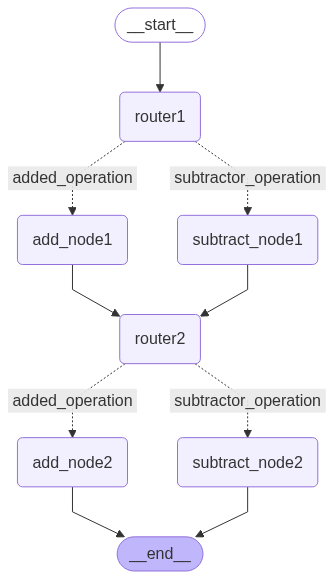

In [50]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png(max_retries=5, retry_delay=2.0)))

In [51]:
input = AgentState(number1 = 2,operation1= '+',number2= 3,number3=5,operation2='-',number4=2)
result = app.invoke(input)


In [52]:
result

{'number1': 2,
 'operation1': '+',
 'number2': 3,
 'finalNumber1': 5,
 'number3': 5,
 'operation2': '-',
 'number4': 2,
 'finalNumber2': 3}